# CS 6476 Assignment 2 | Part 1: Fully-Connected Neural Networks for Image Classification

# AIM
 The aim of this assignment is to implement a fully-connected neural network from scratch on CIFAR-10 image classification dataset.

# Summary
The goal of this part of the assignment is to provide hands-on experience with coding fully connected neural networks from scratch in pytorch. The structure of the coding part of the assignment is modular to iterate over the components involved. Finally we will use, optimize and train our final model on CIFAR-10 image classification dataset, assess the accuracy of our model and answer some questions regarding the same. For you understanding certain blogs have been provided in the notebook. We believe they can help you better understand concepts that you are about to implement. More such resources for reading will be provided over ed-discussions.
## Learning Objectives
- First Prinicipal coding of FC-NN
- Develope basic understanding of components of an end-end FC-NN
- Develope basic uderstanding of regularization techniques and model optimizers
- Develope basic understanding on how to fine tune a model using validation set



## Grading Schema
This part of the assignment will be graded out of 100. A good representative of the testcases are already provided in the notebook.
- Linear Layer (10)
- ReLU Layer (10)
- Convinence Module (10)
- Two-Layer-Network (15)
- Multi-Layer-Network (15)
- Momentum Optimizer (10)
- Dropout (10)
- Optimal Fine Tuned Model (20)


## Time Commitement
This part of the assignment should take about 6 hrs of effort to finish. Half of the time estimate is for the associated readings to get a better understanding of the concepts and how it can be coded.



## Computational Requirements
This part of the assignment should not take more than 20 mins in total to execute each part, including training of the optimal model. These estimates are for code running on CPU. Students can see significantly faster results if running on GPU. Refer to `google colab` setup to see how you can get free access to GPU to execute the assignment if you wish to. (note it is not needed, and CPU execution executes in reasonable time and wont effect your final output or grades).

# Setup
If running on local system install the packages through following commands.
```
pip install opencv-python
pip install torchvision
pip install torch
```


## Colab Setup
First, run the following cell to load the "autoreload" extension. The "autoreload" extension allows you to automatically reload (re-import) Python modules that you've imported or defined when they change. This is particularly useful when you are actively developing or modifying code in external modules and want those changes to be automatically reflected in your notebook without manually restarting the kernel. Those not running colab avoid running the cells associated to `colab setup`

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [31]:
# from google.colab import drive
# drive.mount('/content/drive')

Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the folowing cell should print the filenames from the assignment:

In [32]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a CV2023 folder and put all the files under A2 folder, then 'CV2023/A2'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "Colab Notebooks/CS6476/Assignment2" #enter file name as the above example
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
GOOGLE_DRIVE_PATH = "G:\My Drive\Colab Notebooks\CS6476\Assignment2"
print(os.listdir(GOOGLE_DRIVE_PATH))

['fully_connected_networks.py', 'convolutional_networks.py', 'fully_connected_networks.ipynb', 'simple_models.ipynb', '__pycache__', 'cs6476', 'simple_models.py', 'transfer_learning.ipynb', 'a2_helper.py', 'convolutional_networks.ipynb', 'cifar-10-python.tar.gz', 'cifar-10-batches-py', '.conda']


Once you have successfully mounted your Google Drive and located the path to this assignment, run the following cell to allow us to import from the .py files of this part of the assignment. If it works correctly, it should print the message:
```
Hello from fully_connected_neural_networks.py!
Hello from a2_helper.py!
```

In [33]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

import time, os
os.environ["TZ"] = "US/Eastern"
# time.tzset()

from fully_connected_networks import hello_fully_connected_networks
hello_fully_connected_networks()

from a2_helper import hello_helper
hello_helper()

FC_networks_path = os.path.join(GOOGLE_DRIVE_PATH, 'fully_connected_networks.py')
FC_networks_edit_time = time.ctime(os.path.getmtime(FC_networks_path))
print('fully_connected_networks.py last edited on %s' % FC_networks_edit_time)

Hello from fully_connected_neural_networks.py!!!!!!
Hello from a2_helper.py!
fully_connected_networks.py last edited on Mon Sep 25 04:10:53 2023


On colab install dependecies using:
```
!pip install opencv-python
!pip install torchvision
!pip install torch
```


# Imports
Import requisit packages to work with the provided files for part-1 of the assignment.

In [34]:
import cs6476
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
from cs6476 import Solver

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

In [35]:
DEVICE = 'cpu'

Run this cell to check if you are using a GPU. Don't use GPU if you want to save on your daily GPU usage. We recommend you to save it for the Part 2.

In [36]:
if torch.cuda.is_available():
  DEVICE = 'cuda'
  print('Good to go!')
else:
  print('If you want to use GPU then set it via Edit -> Notebook Settings -> Hardware accelerator -> T4 GPU')

Good to go!


IMPORTANT: If you have reached the GPU usage limit then 'connect without GPU' and change the DEVICE variable in the below cell to 'cpu'. Else make sure to set DEVICE to 'cuda'

In [37]:
# DEVICE = 'cpu'
# uncomment above if GPU is not avaible

DEVICE = 'cuda'
# uncomment above if gpu is avaible

# Data preprocessing

## Load and Visualize the CIFAR-10 dataset
We will first load the CIFAR-10 dataset. The utility function `cs6476.data.preprocess_cifar10()` returns the entire CIFAR-10 dataset as a set of six **Torch tensors** while also preprocessing the RGB images. We then split the data into 3 components, Train, Validate and Test.

- `X_train` contains all training images (real numbers in the range $[0, 1]$)
- `y_train` contains all training labels (integers in the range $[0, 9]$)
- `X_val` contains all validation images
- `y_val` contains all validation labels
- Note: The seed value should remain untouched while coding your experiments, to ensure consistency in results on gradescope.

- To know more about CIFAR datasets read https://www.cs.toronto.edu/~kriz/cifar.html
- Please note that you have to use your `gtid` to set seed for all experiments and code. It will be crucial for accurate testing over gradescope

In [38]:
cs6476.utils.reset_seed(6476)
data_dict = cs6476.data.preprocess_cifar10(cuda=False, dtype=torch.float64)
print('Train data shape: ', data_dict['X_train'].shape)
print('Train labels shape: ', data_dict['y_train'].shape)
print('Validation data shape: ', data_dict['X_val'].shape)
print('Validation labels shape: ', data_dict['y_val'].shape)

Train data shape:  torch.Size([40000, 3072])
Train labels shape:  torch.Size([40000])
Validation data shape:  torch.Size([10000, 3072])
Validation labels shape:  torch.Size([10000])


# Fully-connected neural networks

In this assignment we will implement fully-connected networks using a modular approach. First We will implement a forward and backward function such that we can easily combine a combination of them to build classifiers with different architectures. In addition to implementing fully-connected networks of arbitrary depth, we will also explore different rules for optimization, and Dropout as a regularizer.

To validate our implementation, we have provided testing code for each module. The flow of the notebook is setup in such a fashion as to assist with the order of implementation and to debug code. We also provide visualization modules to test the performance of the model. Finally we ask the students to implment both a 2 layer Fully-Connected NN and an aribtrary depth Fully-Connected NN (with parameters of choice) to test the performance.
  

# Linear layer

For each layer we implement, we will define a class with two static methods `forward` and `backward` (already implemented). The class structure is currently provided in `fully_connected_layers.py`, you will be implementing both the `forward` and `backward` methods.

You can read the following blog ot get a better understanding of the entire process: https://theneuralblog.com/forward-pass-backpropagation-example/

## Linear layer: forward
Test your implementation of `Linear.forward` using below code. You should see errors less than `1e-7`. Use Device as 'cuda' if you have access to GPU.
- you have to implement `out = XW + b`

In [39]:
from fully_connected_networks import Linear

# Test the Linear.forward function
num_inputs = 2
input_shape = torch.tensor((4, 5, 6))
output_dim = 3

input_size = num_inputs * torch.prod(input_shape)
weight_size = output_dim * torch.prod(input_shape)

x = torch.linspace(-0.1, 0.5, steps=input_size, dtype=torch.float64,device='cpu')
w = torch.linspace(-0.2, 0.3, steps=weight_size, dtype=torch.float64,device='cpu')
b = torch.linspace(-0.3, 0.1, steps=output_dim, dtype=torch.float64,device='cpu')
x = x.reshape(num_inputs, *input_shape)
w = w.reshape(torch.prod(input_shape), output_dim)

out, _ = Linear.forward(x, w, b)
correct_out = torch.tensor([[1.49834984, 1.70660150, 1.91485316],
                            [3.25553226, 3.51413301, 3.77273372]]
                            ).double()#.cuda() // uncomment .cuda() if you have access to gpu

print('Testing Linear.forward function:')
print('difference: ', cs6476.grad.rel_error(out, correct_out))

Testing Linear.forward function:
difference:  3.683042923862016e-08


## Linear layer: backward
We have already provided the code for `Linear.backward`. Test the overall implementation using below code. You should see errors less than `1e-7`. Use Device as 'cuda' if you have access to GPU.

In [40]:
from fully_connected_networks import Linear

# Test the Linear.backward function
cs6476.utils.reset_seed(6476)
x = torch.randn(10, 2, 3, dtype=torch.float64)#, device='cuda'
w = torch.randn(6, 5, dtype=torch.float64)
b = torch.randn(5, dtype=torch.float64)
dout = torch.randn(10, 5, dtype=torch.float64)

dx_num = cs6476.grad.compute_numeric_gradient(lambda x: Linear.forward(x, w, b)[0], x, dout)
dw_num = cs6476.grad.compute_numeric_gradient(lambda w: Linear.forward(x, w, b)[0], w, dout)
db_num = cs6476.grad.compute_numeric_gradient(lambda b: Linear.forward(x, w, b)[0], b, dout)

_, cache = Linear.forward(x, w, b)
dx, dw, db = Linear.backward(dout, cache)

# The error should be around e-10 or less
print('Testing Linear.backward function:')
print('dx error: ', cs6476.grad.rel_error(dx_num, dx))
print('dw error: ', cs6476.grad.rel_error(dw_num, dw))
print('db error: ', cs6476.grad.rel_error(db_num, db))

Testing Linear.backward function:
dx error:  4.5474726182638657e-10
dw error:  4.3356172326971976e-10
db error:  1.1326101381667453e-09


# ReLU activation

We will now implement the ReLU nonlinearity. The class structure can be found in `fully_connected_networks.py`

Brief Idea about ReLU and why it is a good activation function: https://www.mygreatlearning.com/blog/relu-activation-function/

## ReLU activation: forward
Test your implementation of `ReLU.forward` using below code. You should see errors less than `1e-8`. Use Device as 'cuda' if you have access to GPU.
- you have to implement `out = max(0,x)`

In [41]:
from fully_connected_networks import ReLU

cs6476.utils.reset_seed(6476)
x = torch.linspace(-0.5, 0.5, steps=12, dtype=torch.float64,device='cpu')
x = x.reshape(3, 4)

out, _ = ReLU.forward(x)
correct_out = torch.tensor([[ 0.,          0.,          0.,          0.,        ],
                            [ 0.,          0.,          0.04545455,  0.13636364,],
                            [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]],
                            dtype=torch.float64,device='cpu')

print('Testing ReLU.forward function:')
print('difference: ', cs6476.grad.rel_error(out, correct_out))

Testing ReLU.forward function:
difference:  4.545454589111042e-09


## ReLU activation: backward
We have already provided the code for `ReLU.backward`. Test the implementation of `ReLU.backward` in your overall code flow using below code. You should see errors less than `1e-8`. Use Device as 'cuda' if you have access to GPU.

In [42]:
from fully_connected_networks import ReLU

cs6476.utils.reset_seed(6476)
x = torch.randn(10, 10, dtype=torch.float64,device='cpu')
dout = torch.randn(*x.shape, dtype=torch.float64,device='cpu')

dx_num = cs6476.grad.compute_numeric_gradient(lambda x: ReLU.forward(x)[0], x, dout)

_, cache = ReLU.forward(x)
dx = ReLU.backward(dout, cache)

print('Testing ReLU.backward function:')
print('dx error: ', cs6476.grad.rel_error(dx_num, dx))

Testing ReLU.backward function:
dx error:  8.182894302999678e-10


# "Convinience" layers
Linear layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define a convenience layer. Combination forward and backward linear layers in conjunction with ReLU is given in code `Linear_ReLU`. Run the following to verify you implementations in conjunction. You should see errors less than `1e-8`.Use Device as 'cuda' if you have access to GPU.

In [43]:
from fully_connected_networks import Linear_ReLU

cs6476.utils.reset_seed(6476)
x = torch.randn(2, 3, 4, dtype=torch.float64,device='cpu')
w = torch.randn(12, 10, dtype=torch.float64,device='cpu')
b = torch.randn(10, dtype=torch.float64,device='cpu')
dout = torch.randn(2, 10, dtype=torch.float64,device='cpu')

out, cache = Linear_ReLU.forward(x, w, b)
dx, dw, db = Linear_ReLU.backward(dout, cache)

dx_num = cs6476.grad.compute_numeric_gradient(lambda x: Linear_ReLU.forward(x, w, b)[0], x, dout)
dw_num = cs6476.grad.compute_numeric_gradient(lambda w: Linear_ReLU.forward(x, w, b)[0], w, dout)
db_num = cs6476.grad.compute_numeric_gradient(lambda b: Linear_ReLU.forward(x, w, b)[0], b, dout)

# Relative error should be around e-8 or less
print('Testing Linear_ReLU.forward and Linear_ReLU.backward:')
print('dx error: ', cs6476.grad.rel_error(dx_num, dx))
print('dw error: ', cs6476.grad.rel_error(dw_num, dw))
print('db error: ', cs6476.grad.rel_error(db_num, db))

Testing Linear_ReLU.forward and Linear_ReLU.backward:
dx error:  5.529825126982408e-10
dw error:  1.1521739210383719e-09
db error:  4.153988158523293e-10


# Loss layers: Softmax
we have provided the softmax loss function to you for free in `helper_functions.py`.You cn verify your code flow so far by running the script below. You should see errors less than `1e-6` for softmax_loss.

In [44]:
from a2_helper import softmax_loss

cs6476.utils.reset_seed(6476)
num_classes, num_inputs = 10, 50
x = 0.001 * torch.randn(num_inputs, num_classes, dtype=torch.float64,device='cpu')
y = torch.randint(num_classes, size=(num_inputs,), dtype=torch.int64,device='cpu')

dx_num = cs6476.grad.compute_numeric_gradient(lambda x: softmax_loss(x, y)[0], x)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss.item())
print('dx error: ', cs6476.grad.rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.302625553080047
dx error:  7.822281027585758e-08


# Two-layer network
Utilize you modular implementation to build a Two-layer network. Complete the implementation in the `TwoLayerNet` class. Test your implementation using the following code.
Note: Backpropogation/Backward pass has already been implemented for your convinience.
Refer to the following formula when adding regularization term to the loss.

$regularized\_loss = loss + \lambda \sum_{j}w_j^2$

In [45]:
from fully_connected_networks import TwoLayerNet
from a2_helper import softmax_loss

cs6476.utils.reset_seed(6476)
N, D, H, C = 3, 5, 50, 7
X = torch.randn(N, D, dtype=torch.float64,device='cpu')
y = torch.randint(C, size=(N,), dtype=torch.int64,device='cpu')

std = 1e-3
model = TwoLayerNet(
          input_dim=D,
          hidden_dim=H,
          num_classes=C,
          weight_scale=std,
          dtype=torch.float64,
          device='cpu'
        )

print('Testing initialization ... ')
W1_std = torch.abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = torch.abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert torch.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert torch.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ... ')
model.params['W1'] = torch.linspace(-0.7, 0.3, steps=D * H, dtype=torch.float64,device='cpu').reshape(D, H)
model.params['b1'] = torch.linspace(-0.1, 0.9, steps=H, dtype=torch.float64,device='cpu')
model.params['W2'] = torch.linspace(-0.3, 0.4, steps=H * C, dtype=torch.float64,device='cpu').reshape(H, C)
model.params['b2'] = torch.linspace(-0.9, 0.1, steps=C, dtype=torch.float64,device='cpu')
X = torch.linspace(-5.5, 4.5, steps=N * D, dtype=torch.float64,device='cpu').reshape(D, N).t()
scores = model.loss(X)
correct_scores = torch.tensor(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]],
    dtype=torch.float64,device='cpu')
scores_diff = torch.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)')
y = torch.tensor([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 49.719461034881775
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

# Errors should be around e-6 or less
for reg in [0.0, 0.7]:
  print('Running numeric gradient check with reg = ', reg)
  model.reg = reg
  loss, grads = model.loss(X, y)

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = cs6476.grad.compute_numeric_gradient(f, model.params[name])
    print('%s relative error: %.2e' % (name, cs6476.grad.rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg =  0.0
W1 relative error: 2.28e-07
W2 relative error: 1.37e-09
b1 relative error: 9.91e-07
b2 relative error: 4.33e-09
Running numeric gradient check with reg =  0.7
W1 relative error: 2.70e-08
W2 relative error: 7.53e-09
b1 relative error: 3.54e-06
b2 relative error: 2.72e-08


# Solver
We have split the logic for training models into a separate class. We use a `Solver` instance to train a `TwoLayerNet` that achieves at least `50%` accuracy on the validation set. For the two layer net we use a specific instance of the function. Use the helper function to get a general idea on how to use `Solver`

In [46]:
print(help(Solver))

Help on class Solver in module cs6476.solver:

class Solver(builtins.object)
 |  Solver(model, data, **kwargs)
 |  
 |  A Solver encapsulates all the logic necessary for training classification
 |  models. The Solver performs stochastic gradient descent using different
 |  update rules.
 |  The solver accepts both training and validation data and labels so it can
 |  periodically check classification accuracy on both training and validation
 |  data to watch out for overfitting.
 |  To train a model, you will first construct a Solver instance, passing the
 |  model, dataset, and various options (learning rate, batch size, etc) to the
 |  constructor. You will then call the train() method to run the optimization
 |  procedure and train the model.
 |  After the train() method returns, model.params will contain the parameters
 |  that performed best on the validation set over the course of training.
 |  In addition, the instance variable solver.loss_history will contain a list
 |  of all 

In [47]:
from fully_connected_networks import create_solver_instance

cs6476.utils.reset_seed(6476)

# Create a solver instance that achieves 50% performance on the validation set
solver = create_solver_instance(data_dict=data_dict, dtype=torch.float64,device='cpu')
solver.train()


(Time 0.01 sec; Iteration 1 / 40000) loss: 2.302585
cpu
(Epoch 0 / 100) train acc: 0.096000; val_acc: 0.092600
(Time 0.17 sec; Iteration 11 / 40000) loss: 2.302499
(Time 0.24 sec; Iteration 21 / 40000) loss: 2.302708
(Time 0.31 sec; Iteration 31 / 40000) loss: 2.302461
(Time 0.39 sec; Iteration 41 / 40000) loss: 2.302875
(Time 0.46 sec; Iteration 51 / 40000) loss: 2.302508
(Time 0.53 sec; Iteration 61 / 40000) loss: 2.302660
(Time 0.61 sec; Iteration 71 / 40000) loss: 2.302694
(Time 0.68 sec; Iteration 81 / 40000) loss: 2.302708
(Time 0.76 sec; Iteration 91 / 40000) loss: 2.302300
(Time 0.83 sec; Iteration 101 / 40000) loss: 2.302500
(Time 0.91 sec; Iteration 111 / 40000) loss: 2.302353
(Time 0.99 sec; Iteration 121 / 40000) loss: 2.302377
(Time 1.06 sec; Iteration 131 / 40000) loss: 2.302177
(Time 1.13 sec; Iteration 141 / 40000) loss: 2.302172
(Time 1.22 sec; Iteration 151 / 40000) loss: 2.302225
(Time 1.31 sec; Iteration 161 / 40000) loss: 2.302729
(Time 1.39 sec; Iteration 171 / 40

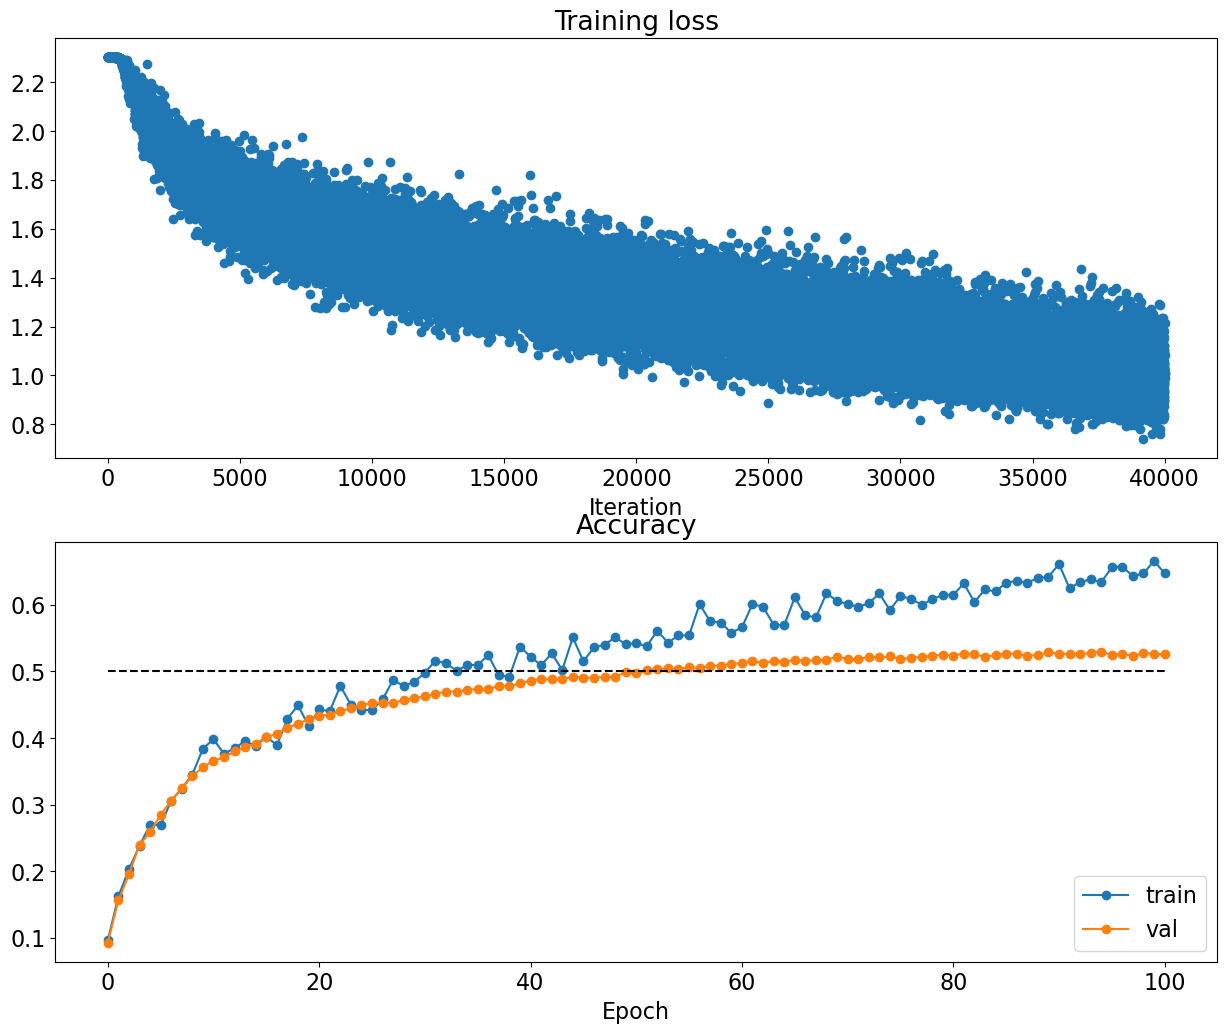

In [48]:
# Run this cell to visualize training loss and train / val accuracy
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multilayer network
On the lines of Two-layer Fully-Connected NN, you have to now implement a Fully-Connected NN which can create model architecture of arbitrary depth. You can ignore incorporating drop out into the code for now.

Read through the `FullyConnectedNet` class in `fully_connected_networks.py`.

Note: Backpropogation/Backward pass has already been implemented for your convinience.

## Initial loss and gradient check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. Do the initial losses seem reasonable?

For gradient checking, you should expect to see errors less than `1e-6`, except for the check on `W1` and `W2` with `reg=0` where your errors should be less than `1e-5`.

In [49]:
from fully_connected_networks import FullyConnectedNet

cs6476.utils.reset_seed(6476)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = torch.randn(N, D, dtype=torch.float64, device='cpu')
y = torch.randint(C, size=(N,), dtype=torch.int64, device='cpu')

for reg in [0, 3.14]:
  print('Running check with reg = ', reg)
  model = FullyConnectedNet(
        [H1, H2],
        input_dim=D,
        num_classes=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=torch.float64,
        device='cpu'
  )

  loss, grads = model.loss(X, y)
  print('Initial loss: ', loss.item())

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = cs6476.grad.compute_numeric_gradient(f, model.params[name])
    print('%s relative error: %.2e' % (name, cs6476.grad.rel_error(grad_num, grads[name])))

Running check with reg =  0
Initial loss:  2.3044274984251465
W1 relative error: 1.07e-07
W2 relative error: 1.02e-07
W3 relative error: 3.95e-08
b1 relative error: 3.07e-07
b2 relative error: 1.99e-08
b3 relative error: 3.43e-09
Running check with reg =  3.14
Initial loss:  11.262880079739869
W1 relative error: 8.80e-09
W2 relative error: 1.05e-08
W3 relative error: 5.43e-09
b1 relative error: 4.43e-07
b2 relative error: 4.39e-08
b3 relative error: 7.58e-09


# Update rules
So far we have used vanilla stochastic gradient descent (SGD) as our update rule. More sophisticated update rules can make it easier to train deep networks. We will implement one of the most commonly used update rules and compare it to vanilla SGD.

## SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochastic gradient descent. See the Momentum Update section at http://cs231n.github.io/neural-networks-3/#sgd for more information.

We provide the implementation of the SGD update rule for your reference in `fully_connected_networks.py`

Now **implement** the SGD+Momentum update rule using the same interface. Run the following to check your implementation of SGD+Momentum. You should see errors less than `1e-7`.



In [50]:
from fully_connected_networks import sgd_momentum

cs6476.utils.reset_seed(6476)

N, D = 4, 5
w = torch.linspace(-0.4, 0.6, steps=N*D, dtype=torch.float64, device='cpu').reshape(N, D)
dw = torch.linspace(-0.6, 0.4, steps=N*D, dtype=torch.float64, device='cpu').reshape(N, D)
v = torch.linspace(0.6, 0.9, steps=N*D, dtype=torch.float64, device='cpu').reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = torch.tensor([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]],
   dtype=torch.float64)#, device='cuda'
expected_velocity = torch.tensor([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]],
   dtype=torch.float64, device='cpu')

# Should see relative errors around e-8 or less
print('next_w error: ', cs6476.grad.rel_error(next_w, expected_next_w))
print('velocity error: ', cs6476.grad.rel_error(expected_velocity, config['velocity']))

next_w error:  1.6802078709310813e-09
velocity error:  2.9254212825785614e-09


Once you have done so, run the following to train a six-layer network with both SGD and SGD+momentum. You should see the SGD+momentum update rule converge faster.

running with  sgd
(Time 0.01 sec; Iteration 1 / 200) loss: 2.302280
cpu
(Epoch 0 / 5) train acc: 0.096000; val_acc: 0.102500
cpu
(Epoch 1 / 5) train acc: 0.115000; val_acc: 0.099700
cpu
(Epoch 2 / 5) train acc: 0.113000; val_acc: 0.112000
cpu
(Epoch 3 / 5) train acc: 0.153000; val_acc: 0.138300
cpu
(Epoch 4 / 5) train acc: 0.105000; val_acc: 0.110800
cpu
(Epoch 5 / 5) train acc: 0.113000; val_acc: 0.107400

running with  sgd_momentum
(Time 0.01 sec; Iteration 1 / 200) loss: 2.302801
cpu
(Epoch 0 / 5) train acc: 0.109000; val_acc: 0.106600
cpu
(Epoch 1 / 5) train acc: 0.128000; val_acc: 0.108400
cpu
(Epoch 2 / 5) train acc: 0.162000; val_acc: 0.163700
cpu
(Epoch 3 / 5) train acc: 0.183000; val_acc: 0.178500
cpu
(Epoch 4 / 5) train acc: 0.265000; val_acc: 0.240000
cpu
(Epoch 5 / 5) train acc: 0.268000; val_acc: 0.236600



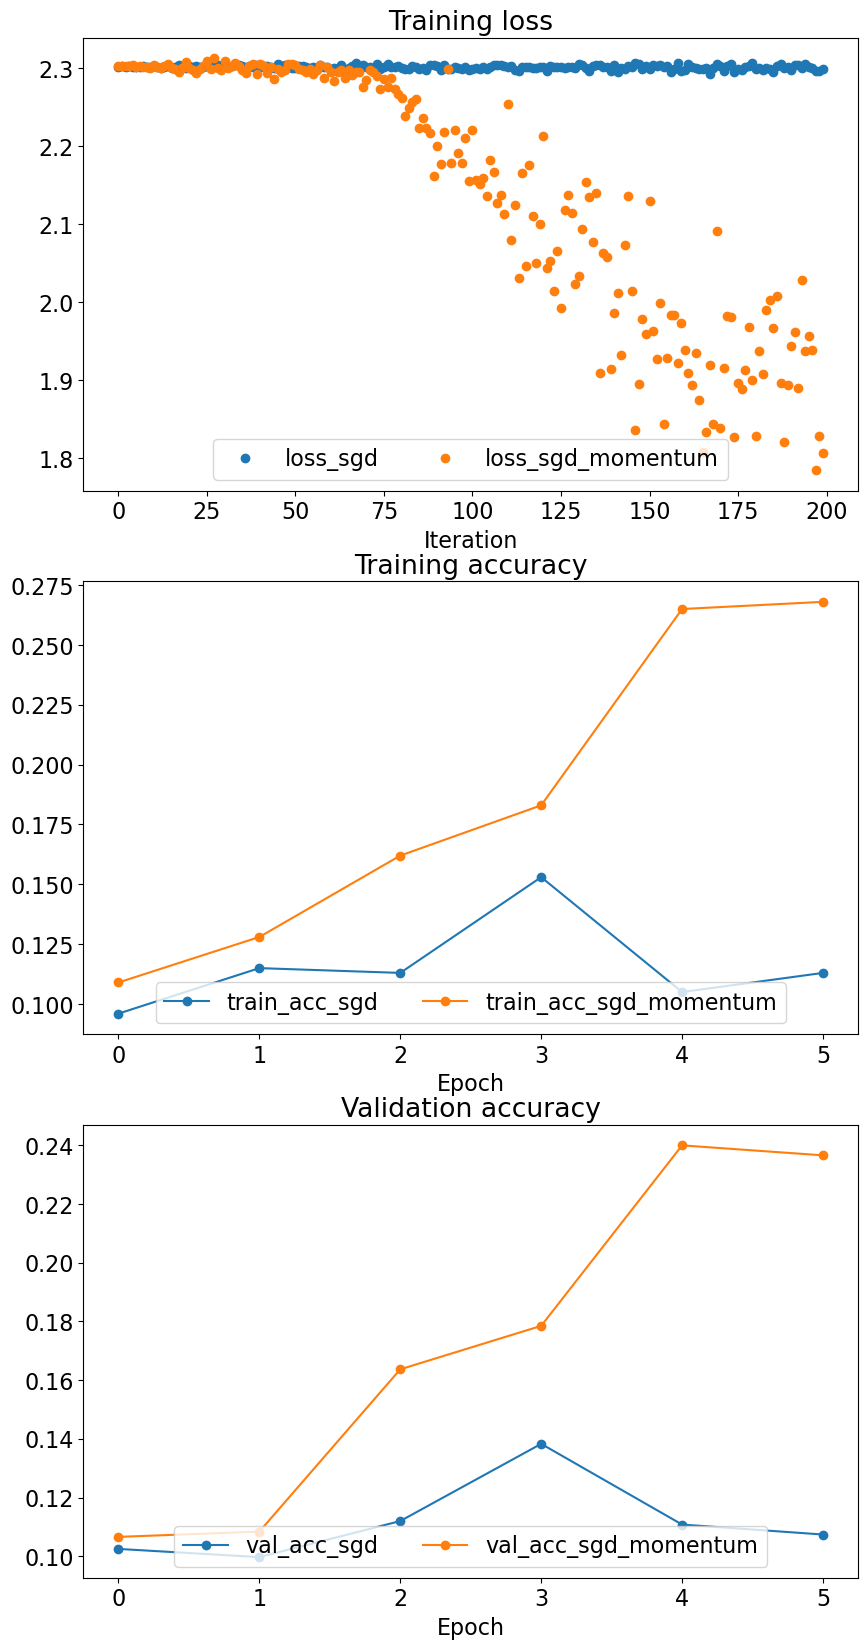

In [51]:
from fully_connected_networks import FullyConnectedNet, sgd, sgd_momentum,adam

# TODO: Use a three-layer Net to overfit 50 training examples by
# tweaking just the learning rate and initialization scale.
cs6476.utils.reset_seed(6476)

num_train = 4000
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}

solvers = {}

for update_rule_name, update_rule_fn in [('sgd', sgd), ('sgd_momentum', sgd_momentum)]:
  print('running with ', update_rule_name)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2,
                            dtype=torch.float32)#, device='cuda'

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule_fn,
                  optim_config={
                    'learning_rate': 5e-2,
                  },
                  print_every=1000,
                  verbose=True, device='cpu')#
  solvers[update_rule_name] = solver
  solver.train()
  print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')
for update_rule, solver in solvers.items():
  plt.plot(solver.loss_history, 'o', label="loss_%s" % update_rule)
plt.legend(loc='lower center', ncol=4)

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')
for update_rule, solver in solvers.items():
  plt.plot(solver.train_acc_history, '-o', label="train_acc_%s" % update_rule)
plt.legend(loc='lower center', ncol=4)


plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')
for update_rule, solver in solvers.items():
  plt.plot(solver.val_acc_history, '-o', label="val_acc_%s" % update_rule)
plt.legend(loc='lower center', ncol=4)

plt.gcf().set_size_inches(10, 20)
plt.show()

# Dropout
Dropout [1] is a technique for regularizing neural networks by randomly setting some output activations to zero during the forward pass. You will implement a dropout layer, provisions for which already exist in fully-connected network to optionally use dropout.

[1] [Geoffrey E. Hinton et al, "Improving neural networks by preventing co-adaptation of feature detectors", arXiv 2012](https://arxiv.org/abs/1207.0580)

Another blog with code to understand dropout: https://medium.com/analytics-vidhya/a-simple-introduction-to-dropout-regularization-with-code-5279489dda1e

## Dropout: forward
**Implement** the forward pass for dropout in `fully_connected_networks.py`. Since dropout behaves differently during training and testing, make sure to implement the operation for both modes. Adjust your code in `FullyConnectedNet` to incorporate dropout.

Run the following to test your dropout implementation. The mean of the output should be approximately the same during training and testing. During training the number of outputs set to zero should be approximately equal to the drop probability `p`, and during testing no outputs should be set to zero.

In [52]:
from fully_connected_networks import Dropout

cs6476.utils.reset_seed(6476)
x = torch.randn(500, 500, dtype=torch.float64, device='cpu') + 10

for p in [0.25, 0.4, 0.7]:
  out, _ = Dropout.forward(x, {'mode': 'train', 'p': p})
  out_test, _ = Dropout.forward(x, {'mode': 'test', 'p': p})

  print('Running tests with p = ', p)
  print('Mean of input: ', x.mean().item())
  print('Mean of train-time output: ', out.mean().item())
  print('Mean of test-time output: ', out_test.mean().item())
  print('Fraction of train-time output set to zero: ', (out == 0).type(torch.float32).mean().item())
  print('Fraction of test-time output set to zero: ', (out_test == 0).type(torch.float32).mean().item())
  print()

Running tests with p =  0.25
Mean of input:  9.999399142524672
Mean of train-time output:  9.989369677631222
Mean of test-time output:  9.999399142524672
Fraction of train-time output set to zero:  0.2507399916648865
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.4
Mean of input:  9.999399142524672
Mean of train-time output:  9.981820687834222
Mean of test-time output:  9.999399142524672
Fraction of train-time output set to zero:  0.401091992855072
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.7
Mean of input:  9.999399142524672
Mean of train-time output:  10.012133403470711
Mean of test-time output:  9.999399142524672
Fraction of train-time output set to zero:  0.6996279954910278
Fraction of test-time output set to zero:  0.0



## Dropout: backward
Note: Backpropogation/Backward pass has already been implemented for your convinience. You can just run the below cell to test the overall implementation of the flow.

In [53]:
from fully_connected_networks import Dropout

cs6476.utils.reset_seed(6476)
x = torch.randn(10, 10, dtype=torch.float64, device='cpu') + 10
dout = torch.randn_like(x)

dropout_param = {'mode': 'train', 'p': 0.2, 'seed': 0}
out, cache = Dropout.forward(x, dropout_param)
dx = Dropout.backward(dout, cache)
dx_num = cs6476.grad.compute_numeric_gradient(lambda xx: Dropout.forward(xx, dropout_param)[0], x, dout)

# Error should be around e-10 or less
print('dx relative error: ', cs6476.grad.rel_error(dx, dx_num))

dx relative error:  4.815092295092456e-09


# Fully-connected nets with dropout
Test your drop-out implementation with Fully-Connected-NN. Run the following to numerically gradient-check your implementation. You should see errors less than `1e-5`, and different dropout rates should result different error values. We also provide an example code on how you can use `FullyConnectedNet` to run experiments and play with parameters.
Note: An implemenation of `adam` optimizer is already provided in the `fully_connected_networks.py` file. Feel free to plug it as an optimizer for testing.

In [54]:
from fully_connected_networks import FullyConnectedNet

cs6476.utils.reset_seed(6476)

N, D, H1, H2, C = 2, 15, 20, 30, 10
X = torch.randn(N, D, dtype=torch.float64, device='cpu')#
y = torch.randint(C, size=(N,), dtype=torch.int64, device='cpu')

for dropout in [0, 0.25, 0.5]:
  print('Running check with dropout = ', dropout)
  model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            weight_scale=5e-2, dropout=dropout,
                            seed=0, dtype=torch.float64, device='cpu')

  loss, grads = model.loss(X, y)
  print('Initial loss: ', loss.item())

  # Relative errors should be around e-5 or less.
  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = cs6476.grad.compute_numeric_gradient(f, model.params[name])
    print('%s relative error: %.2e' % (name, cs6476.grad.rel_error(grad_num, grads[name])))
  print()

Running check with dropout =  0
Initial loss:  2.3044274984251465
W1 relative error: 1.07e-07
W2 relative error: 1.02e-07
W3 relative error: 3.95e-08
b1 relative error: 3.07e-07
b2 relative error: 1.99e-08
b3 relative error: 3.43e-09

Running check with dropout =  0.25
Initial loss:  2.309211358114566
W1 relative error: 6.12e-08
W2 relative error: 5.55e-08
W3 relative error: 3.94e-08
b1 relative error: 7.11e-08
b2 relative error: 1.45e-08
b3 relative error: 3.28e-09

Running check with dropout =  0.5
Initial loss:  2.2983256399145002
W1 relative error: 3.10e-08
W2 relative error: 3.89e-08
W3 relative error: 2.81e-08
b1 relative error: 4.98e-08
b2 relative error: 9.75e-09
b3 relative error: 2.63e-09



In [55]:
from fully_connected_networks import FullyConnectedNet

# Train two identical nets, one with dropout and one without
cs6476.utils.reset_seed(6476)
num_train = 40000
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}


model = FullyConnectedNet([512], dropout=0.5, dtype=torch.float32, device='cpu')

solver = Solver(model, small_data,
                num_epochs=100, batch_size=512,
                update_rule=sgd_momentum,
                optim_config={
                  'learning_rate': 5e-3,
                },
                print_every=100000, print_acc_every=10,
                verbose=True, device='cpu')
solver.train()
print(solver)

(Time 0.03 sec; Iteration 1 / 7800) loss: 2.304067
cpu
(Epoch 0 / 100) train acc: 0.089000; val_acc: 0.096800
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
(Epoch 10 / 100) train acc: 0.427000; val_acc: 0.410900
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
(Epoch 20 / 100) train acc: 0.465000; val_acc: 0.453500
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
(Epoch 30 / 100) train acc: 0.515000; val_acc: 0.481500
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
(Epoch 40 / 100) train acc: 0.540000; val_acc: 0.501800
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
(Epoch 50 / 100) train acc: 0.549000; val_acc: 0.517000
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
(Epoch 60 / 100) train acc: 0.549000; val_acc: 0.524200
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
(Epoch 70 / 100) train acc: 0.623000; val_acc: 0.528200
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
(Epoch 80 / 100) train acc: 0.624000; val_acc: 0.533100
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
(Epoch 90 / 100) train acc: 0.611000; val_acc: 0.542500
cpu
cpu
cpu
cpu
cpu
cpu
cp

## Optimzation Experiments
Congraturaltions you have all the code you need to train your fully connected neural network. Play around with things like network depth, dropout rate, hidden layer width and optimization algorithm to produce the best result. You can use the testing code provided above to set your own experiments. Once you have the optimal parameters create a function `optimal` in the file `fully_connected_networks.py` of the form:
```
def optimal(data):
    model = FullyConnectedNet([256], dropout=0.5, dtype=torch.float32, device='cpu')
    solver = Solver(model, data,
                    num_epochs=100, batch_size=512,
                    update_rule=sgd_momentum,
                    optim_config={
                    'learning_rate': 5e-3,
                    },
                    print_every=100000, print_acc_every=10,
                    verbose=True, device='cpu')
    solver.train()# dont forget to comment this line in final submission after you have trained your model
    solver.model.save(path)# dont forget to comment this line in final submision after you have saved your model
    return solver
```
Optimal parameters can be hardcoded. Autograder will use its own data of the format provided in above cell `small_data` for testing. Please save the model as `fcn_model.pth`. Make sure that device is set tp `cpu` in the final submission.

```
def gtid():
    return gtid
```
also write a function which return your gtid as an integer value. Please note that you have to use your gtid to set seed for all experiments and code. It will be crucial for accurate testing over gradescope